<a href="https://colab.research.google.com/github/estrickler1/CSPMA4413/blob/main/Strickler_Ethan_CPSMA4413_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author of Code:

Watan Chaudhary

Chiran Rayamajhi

Bigyan Sharma

Ethan Strickler

In [ ]:
import math
Pi = math.pi                                                                                                     #Number Pi
Sqrt2 = math.sqrt(2)                                                                                             #Number SQRT(2)
Center = Pi/4                                                                                                    #Taylor Series Center, Able to Change at any Time, Integrated Throughout Program
Funct = lambda x: x**3 - 0.165*x**2 + 3.993*10**(-4)                                                             #Chosen Function
Der = lambda x: 3*x**2 - 0.33*x                                                                                  #Derivative of Chosen Function

def TrueError(Estimate, Actual):                                                                                 #Defines True Error
  return Actual - Estimate

def RelativeTrueError(Estimate, Actual):                                                                         #Defines Relative True Error
  return TrueError(Estimate, Actual) / Actual

def ApproximateError(PreEstimate, CurEstimate):                                                                  #Defines Approximate Error
  return CurEstimate - PreEstimate

def RelativeApproximateError(PreEstimate, CurEstimate):                                                          #Defines Relative Approximate Error
  return ApproximateError(PreEstimate, CurEstimate) / CurEstimate
def GeneralTaylorCoefficient(Degree):                                                                            #Defines General Taylor Series
  return (-1)**(math.floor(Degree/2))/(Sqrt2*math.factorial(Degree))

def TaylorPolynomialTerm(Degree, Input):                                                                         #Defines Specific Term in Taylor Series
  return GeneralTaylorCoefficient(Degree)*(Input-Center)**Degree

def TaylorPolynomial(Degree, Input):                                                                             #Defines a Taylor Series, with a Specified Order, and Input
  sum = 0
  for i in range(0, Degree+1):
    sum = sum +  TaylorPolynomialTerm(i, Input)
  return sum

def LagrangeCoefficient(InArray,OutArray,Entry,Variable):                                                        #Defines Lagrange Coefficient
  lc = 1
  for i in range(len(InArray)):
    if i == Entry:
      continue
    else:
      lc = lc*(Variable - InArray[i])/(InArray[Entry]-InArray[i])
  return lc

def LagrangeInterpolator(InArray, OutArray, Variable):                                                           #Defines LagrangeInterpolator
  li = 0
  for i in range(len(InArray)):
    li = li + LagrangeCoefficient(InArray,OutArray,i,Variable)*OutArray[i]
  return li

In [ ]:
def NewtonIterator(Function, Derivative, CurValue):                                                              #Defines Newton Iterator
  return CurValue - Function(CurValue)/Derivative(CurValue)

In [ ]:
def NewtonAlgorithm(Function, Derivative, IntValue, Tolerrance, MaxIterations):                                  #Defines Netwon Algorithm used to find the next spacial values
  x = IntValue
  i = 1
  while i <= (MaxIterations):                                                                                
    if Derivative == 0:                                                                                          #Checks for Division by Zero
      return 'Zero Derivative, therefore divides by zero. Thus, No Solution'
    if abs(Function(x)) < Tolerrance:                                                                            #Checks if the Tolerrance is met
      return [x,i]
    x = NewtonIterator(Function, Derivative, x)                                                                  #Calls the NewtonIterator to Find the next Value of x
    i = i + 1                                                                                                    #Creates the next Spacial Step
  return 'The number of iterations is exceeded. Must have a higher number of iterations.'
  return None
  

In [ ]:
NewtonAlgorithm(Funct, Der, 1, 0.001, 10)                                                                         #Using Newton Algorithm

[0.16557352841216189, 7]

In [ ]:
NewtonAlgorithm(Funct, Der, 5, 0.001, 11)

[0.16764805046489362, 11]

In [ ]:

SeedValue = [Pi/6, Pi/3, Pi/4, Pi/2, Pi, 3*Pi/2, 2*Pi, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 15, 20]
Roots = []
Iterations = []
Tolerrance = 0.00001
MaxIterations = 30

for Seed in SeedValue:                                                                                   #Creating a Large Number of Tests

  if NewtonAlgorithm(Funct, Der, Seed, Tolerrance, MaxIterations) != None:
    Roots.append(NewtonAlgorithm(Funct, Der, Seed, Tolerrance, MaxIterations)[0])
    Iterations.append(NewtonAlgorithm(Funct, Der, Seed, Tolerrance, MaxIterations)[1])

  else:
    Roots.append('None Found')
    Iterations.append('>',MaxIterations)

print(SeedValue)
print(Roots)
print(Iterations)

[0.5235987755982988, 1.0471975511965976, 0.7853981633974483, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 6.283185307179586, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 15, 20]
[0.14636633463347515, 0.14677547414251266, 0.14637284055492858, 0.14685006623205382, 0.14656175260649806, 0.14657395793506175, 0.14642296229400395, 0.06315888783266142, 0.14657793016749582, 0.14677278805896787, 0.14662897517269097, 0.14647295372735347, 0.14648529551522205, 0.14673052799019526, 0.14648638378293458, 0.14648887562742027, 0.14639295243668574]
[8, 9, 9, 10, 12, 13, 14, 5, 5, 7, 9, 11, 12, 13, 15, 16, 17]


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'Iterations']),
                 cells=dict(values = [SeedValue, Roots, Iterations]))
                     ])
fig.show()

Secant method to find root of the function


In [ ]:
def Secant(Function, OldValue, NewValue):
  x = NewValue - Function(NewValue)*(NewValue - OldValue)/(Function(NewValue)-Function(OldValue))        
  return x

def SecantMethod(Function, FstValue, SndValue, Iterations):
  x = [FstValue, SndValue]
  for i in range(Iterations):
    x.append(Secant(Function,x[-2],x[-1]))
  return x

In [ ]:
SecantMethod(math.sin, 5/2, 7/3, 3)

[2.5,
 2.3333333333333335,
 3.300436286112567,
 3.1268523846285965,
 3.141649032817743]

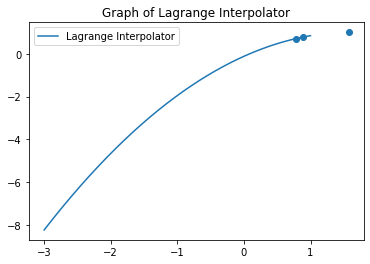

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
InValues = [Center,Center+.1,2*Center]
OutValues = [math.sin(x) for x in InValues]

x = np.arange( -3,1,.001)
plt.scatter(InValues,OutValues)
plt.plot(x, LagrangeInterpolator(InValues, OutValues,x))
#plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator'])

plt.show()

As, you can see above that we have used secant Method to find the roots of the cubic function we have used. The details of roots values upto 20 are also shown in iteration table. Similary the algorithm and its roots values have been graphed using Lagrange Interpolation method.The three roots values can be seen on the graph. The three  values falls on the rising curve. But it looks like only two values fall on the curve because of small curve.

We have to find the intial guess, x to the base value zero  in Newton's Method to know the roots of the known function. Once , the initial seeds define the given function to perform under certain circumstances, the values of recurring roots of the function are almost approximate to three decimal values as shown in above iterations table. We were suprised to be honest by the convergence of values of the roots since initial seeds play an important role in it.

Here, we came to find out the differences between Newton method & secant algorithm(since we have used secant method instead of bisection or false-position ).Although both methods are almost same , Newton's Method uses a line i.e tangent to one point where as the Secant Method uses a line i.e secant to two points.

  The cases like division by zero , root jumping so not getting intended solution, the occurence of Infection point issue are not appropriate for Newton-Raphson Method.

  Lagrange Interpolation is generally  used for theory . It helps find the coefficients , only takes linear time to calculate it. we didn't know despite of using this method to solve higher-order polynomials , this takes much computer time, so it's not that much popular method in practical.